In this project, we'll work with the datasets from exit surverys of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. We are going to answer two questions base on our study: 
1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [1]:
# Read in datasets and check those bbasic information
import numpy as np
import pandas as pd

dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

# Avoid truncated display of columns such that we can explore the whole dataset
pd.options.display.max_columns = 100 

dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [2]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [3]:
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [4]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

Brief Summary:
1. Both datasets have more than one column related to "unsatisfactory"
2. Both datasets have many unnecessary columns for our study
3. These datasets share some columns that have different names but same contents with each other
4. In the DETE dataset, some cells are marked as "not stated" instead of Null/NaN
5. In the DETE dataset, some columns have most of their cells as empty like Business Unit and Aboriginal
6. In the TAFE dataset, names of many columns are too long 

In [5]:
# Specify the values that should be NaN
dete_survey = pd.read_csv("dete_survey.csv", na_values = "Not Stated")

# Drop the columns not necessary for our study in this project
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

dete_survey_updated.info()
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

As discussed above, "Not Stated" should be replaced by NaN to avoid any misleading. Also, since we would like to learn about the relationship between ages and working time of those who resigned with dissatisfaction, we can drop other unrelated columns.

In [6]:
# Next step will be making the column names in two datesets uniform
# Change the format for column names in the DETE dataset
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace("\s", "_")
print(dete_survey_updated.columns)

# Rename the column names in the TAFE dataset
mapping = {"Record ID":"id", "CESSATION YEAR":"cease_date", "Reason for ceasing employment": "separationtype",
           "Gender. What is your Gender?":"gender", "CurrentAge. Current Age":"age", "Employment Type. Employment Type":
           "employment_status", "Classification. Classification":"position",
           "LengthofServiceOverall. Overall Length of Service at Institute (in years)":"institute_service",
           "LengthofServiceCurrent. Length of Service at current workplace (in years)":"role_service"}

tafe_survey_updated.rename(mapping, axis = 1, inplace = True)
print(tafe_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')
Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employmen

In [7]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [8]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Since we will finally combine these two dataset together, it is better have names of columns, whose contents are the same, in these two datasets consistent with each other. So we firstly change the format of column names in the DETE dataset and then rename some of important columns' name in the TAFE dataset since the names in this dataset is too long to be easily readable. 

In [9]:
# Again, since we focus those data about people resigned, we want to only keep those related rows
# We first check which rows we should keep
print(dete_survey_updated["separationtype"].value_counts(), "\n")
print(tafe_survey_updated["separationtype"].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64 

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [10]:
# Change all three types of resignation in the DETE dataset into "Resignation" for convenience
dete_survey_updated["separationtype"] = dete_survey_updated["separationtype"].str.split('-').str[0]
dete_survey_updated["separationtype"].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [11]:
# Select those rows with the separation type of resignation and keep them
dete_resignations = dete_survey_updated[dete_survey_updated["separationtype"] == "Resignation"].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"] == "Resignation"].copy()

# dete_resignations = dete_survey_updated[dete_survey_updated["separationtype"] == "Resignation"].copy()

print(dete_resignations["separationtype"].value_counts(), "\n")
print(tafe_resignations["separationtype"].value_counts())

Resignation    311
Name: separationtype, dtype: int64 

Resignation    340
Name: separationtype, dtype: int64


Since we focus those data about people resigned, we want to only keep those related rows. First thing we want to do is to make sure we don't lose any information so we change all three types of resignation in the DETE dataset into "Resignation", then we select those rows with separationtype of "Resignation" and keep them.

In [12]:
# Check the years in each dataset for logical inconsistencies
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
2010         1
07/2006      1
07/2012      1
Name: cease_date, dtype: int64

In [13]:
# Extract the year of cease_date and store as a float
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.split("/").str[-1].astype(float)

In [14]:
print(dete_resignations["cease_date"].value_counts().sort_index(), "\n")
print(dete_resignations["dete_start_date"].value_counts().sort_index(), "\n")
print(tafe_resignations["cease_date"].value_counts().sort_index())

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64 

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64 

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64


In the DETE dataset, the cease_date ranges from 2006-2014 (but only two in 2006-2010, so mostly from 2012-2014), the cease_date ranges from 2009-2013 in the TAFE dataset. The start year in the DETE ranges from 1963 to 2013. The range of these years are acceptable. We still see some rows with empty value here, but we now just keep all these data.

In [15]:
# We want to study the difference from working period, so we will calculate the time of working in the DETE dataset
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]

In order to answer the question "Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?", we should know the working period in the DETE dataset. To be consistent with the TAFE dataset, we assign this value to a new column named "institute_service".

In [16]:
# To analyze if satisfied or not, we add in a new column to summarize from multiple columns
# Any of those columns shows unsatisfactory, we assign True to the new column (False for all False, NaN for all NaN)
print(tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts(), "\n")
print(tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64 

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [17]:
# Update the values in these columns
def update_vals(a):
    if pd.isnull(a):
        return np.nan
    elif a == "-":
        return False
    else:
        return True

# Assign the value to the new column
tafe_resignations["dissatisfied"] = tafe_resignations[["Contributing Factors. Dissatisfaction",
                                                       "Contributing Factors. Job Dissatisfaction"]].applymap(update_vals).any(1, skipna=False)
dete_resignations["dissatisfied"] = dete_resignations[["job_dissatisfaction", "dissatisfaction_with_the_department", "physical_work_environment",
                                                      "lack_of_recognition", "lack_of_job_security", "work_location", "employment_conditions",
                                                      "work_life_balance", "workload"]].any(1, skipna=False)

tafe_resignations_up = tafe_resignations.copy()
dete_resignations_up = dete_resignations.copy()

print(tafe_resignations["dissatisfied"].value_counts(dropna = False))
print(dete_resignations_up["dissatisfied"].value_counts(dropna = False))

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64
False    162
True     149
Name: dissatisfied, dtype: int64


We want to identify any employees who resigned due to dissatisfaction. Since there are multiple columns related to dissatisfaction, we choose to create a new column such that if the employee indicated any of the related factors causing their resign, we'll assign "Ture".

In [18]:
# We now start to aggregate the dataset according to the institute_service column
# We first create one new column for each dataset with their name such that we can easily separate them after aggregation
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

# Combine these cleaned two datasets
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index = True)

# Drop columns with too many null values
combined_update = combined.dropna(axis = 1, thresh = 500)
combined_update.notnull().sum()

age                  596
cease_date           635
dissatisfied         643
employment_status    597
gender               592
id                   651
institute            651
institute_service    563
position             598
separationtype       651
dtype: int64

With all datasetse cleaned, we now start to aggregate the dataset according to the institute_service column in order to answer our ultimate questions. We first create one new column for each dataset with their name such that we can easily separate them after aggregation and then drop the columns with too many null values.

In [19]:
combined_update["institute_service"].value_counts(dropna = False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
39.0                   3
32.0                   3
21.0                   3
26.0                   2
28.0                   2
30.0                   2
36.0                   2
25.0                   2


In [20]:
# We can see that there too many differeny categories in the column of institute_service, we will re-categorize them
# We pick the lower value if there's a range
combined_update["institute_service"] = combined_update["institute_service"].astype(str).str.extract(r'(\d+)').astype(float)

# Apply a function to re-categorize
def categorize(a):
    if pd.isnull(a):
        return np.nan
    elif a < 3:
        return "New"
    elif 3 <= a < 7:
        return "Experienced"
    elif 7 <= a < 10:
        return "Established"
    elif a > 10:
        return "Veteran"

combined_update["service_cat"] = combined_update["institute_service"].apply(categorize)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  app.launch_new_instance()
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexi

From the value_counts() of the institute_service column, we can see that there too many differeny categories in this column such that the summary will be very difficult for this column. As a result, we want to classify these values into different categories and we start with extracting and changing all values into numbers, then we classify them based on different years.

In [21]:
print(combined_update["service_cat"].value_counts(dropna = False), "\n")
print(combined_update["dissatisfied"].value_counts(dropna = False))

New            193
Experienced    172
Veteran        136
NaN             94
Established     56
Name: service_cat, dtype: int64 

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64


/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


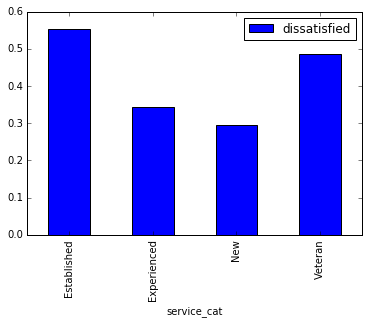

In [24]:
# Since there are only very few null values in the dissatisfied column, we replace null values with most frequent "False"
combined_update["dissatisfied"].fillna(value = False, inplace = True)

summary = combined_update.pivot_table(values = "dissatisfied", index = "service_cat", aggfunc = np.mean)

%matplotlib inline
summary.plot(kind = "bar")

From the final result, we can see that employees classied as "Established" and "Veteran", who has more than 7 years of working experience, tends to resign due to some dissatification in their job. In comparison, the new employees with experience within 1 year has the loweste portion to resign due to dissatisfaction.